# Movie Performance Analysis (IMDb Ratings vs Box Office)
This notebook explores how IMDb ratings correlate with box office revenue.
Datasets: IMDb basics, ratings, and box office data (cleaned and merged).

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression

# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [66]:
DATA_PATH = r"C:\Users\athul\Desktop\Learn\Project\Movie Project\Data\Cleaned"
Merged_file = os.path.join(DATA_PATH, "merged_movies.xlsx")

df = pd.read_excel(Merged_file, sheet_name="Merged_movies_cleaned")

df = df.drop_duplicates()

print(df.shape)
df.info()
df.describe()

df.head(10)

(2494, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tconst                  2494 non-null   object        
 1   titleType               2494 non-null   object        
 2   primaryTitle            2494 non-null   object        
 3   originalTitle           2494 non-null   object        
 4   isAdult                 2494 non-null   int64         
 5   startYear               2494 non-null   int64         
 6   endYear                 2494 non-null   object        
 7   runtimeMinutes          2494 non-null   int64         
 8   genres_x                2494 non-null   object        
 9   averageRating           2494 non-null   float64       
 10  numVotes                2494 non-null   int64         
 11  adult                   2494 non-null   bool          
 12  belongs_to_collection   572 non-null 

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_x,averageRating,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,tt0499549,movie,Avatar,Avatar,0,2009,\N,162,"Action,Adventure,Fantasy",7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0848228,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Sci-Fi",8.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0369610,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",6.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt2820852,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,"Action,Thriller",7.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt2395427,movie,Avengers: Age of Ultron,Avengers: Age of Ultron,0,2015,\N,141,"Action,Adventure,Sci-Fi",7.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,tt1201607,movie,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,0,2011,\N,130,"Adventure,Family,Fantasy",8.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tt2294629,movie,Frozen,Frozen,0,2013,\N,102,"Adventure,Animation,Comedy",7.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,tt2771200,movie,Beauty and the Beast,Beauty and the Beast,0,2017,\N,129,"Adventure,Family,Fantasy",7.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tt4630562,movie,The Fate of the Furious,The Fate of the Furious,0,2017,\N,136,"Action,Crime,Thriller",6.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tt1300854,movie,Iron Man 3,Iron Man Three,0,2013,\N,130,"Action,Adventure,Sci-Fi",7.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
print("\nMissing Values:\n", df.isnull().sum())

Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['revenue'] < (Q1 - 1.5 * IQR)) | (df['revenue'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of revenue outliers: {len(outliers)}")
outliers[['primaryTitle', 'revenue', 'averageRating']].head(10)


Missing Values:
 tconst                       0
titleType                    0
primaryTitle                 0
originalTitle                0
isAdult                      0
startYear                    0
endYear                      0
runtimeMinutes               0
genres_x                     0
averageRating                0
numVotes                     0
adult                        0
belongs_to_collection     1922
budget                       0
genres_y                     0
homepage                  1113
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                     0
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date                 0
Release year                 0
revenue                      0
runtime                      0
spoken_languages             0
status                       0
tagline              

,primaryTitle,revenue,averageRating
0,Avatar,2787965087,7.90
1,The Avengers,1519557910,8.00
2,Jurassic World,1513528810,6.90
3,Furious 7,1506249360,7.10
4,Avengers: Age of Ultron,1405403694,7.30
5,Harry Potter and the Deathly Hallows: Part 2,1342000000,8.10
6,Frozen,1274219009,7.40
7,Beauty and the Beast,1262886337,7.10
8,The Fate of the Furious,1238764765,6.60
9,Iron Man 3,1215439994,7.10


In [68]:
def format_kmb(x, _):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.0f}M'
    elif x >= 1e3:
        return f'${x/1e3:.0f}K'
    else:
        return f'${x:.0f}'


C:\Users\athul\AppData\Local\Temp\ipykernel_49548\1641007499.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 5e9)  # Adjusted max


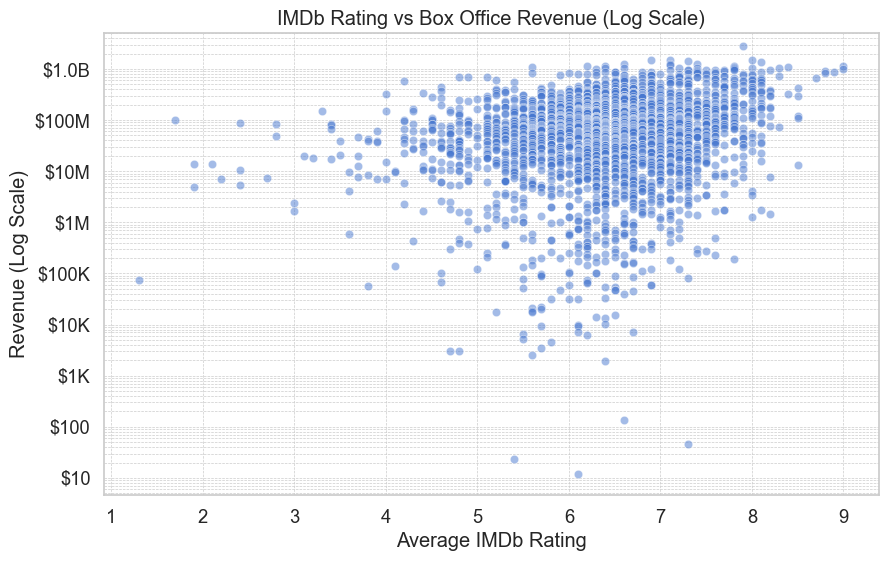

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='averageRating', y='revenue', alpha=0.5)
plt.title("IMDb Rating vs Box Office Revenue (Log Scale)")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Revenue (Log Scale)")

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_kmb))
plt.ylim(0, 5e9)  # Adjusted max
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


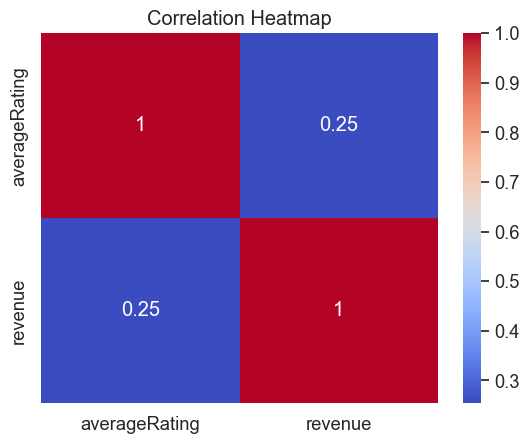

In [70]:
corr = df[['averageRating', 'revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


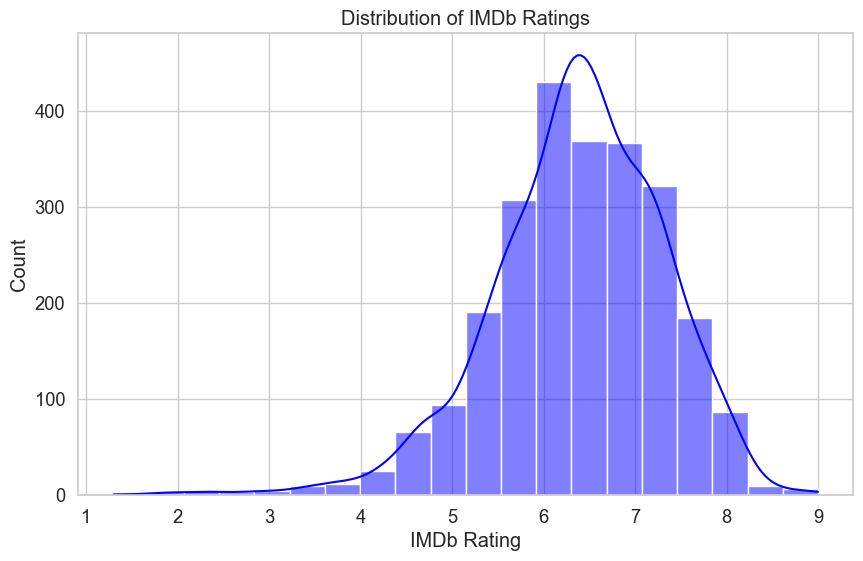

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['averageRating'], bins=20, kde=True, color='blue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [72]:
# Average revenue by rating bins
df['rating_bin'] = pd.cut(df['averageRating'], bins=[0,5,7,8,10], labels=['Low','Medium','High','Very High'])
avg_revenue_by_rating = df.groupby('rating_bin')['revenue'].mean()
print("\nAverage Revenue by Rating Range:\n", avg_revenue_by_rating)



Average Revenue by Rating Range:
 rating_bin
Low          63636923.50
Medium      107642729.86
High        198046718.04
Very High   397566913.12
Name: revenue, dtype: float64


C:\Users\athul\AppData\Local\Temp\ipykernel_49548\608651359.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_by_rating = df.groupby('rating_bin')['revenue'].mean()


C:\Users\athul\AppData\Local\Temp\ipykernel_49548\1943389343.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 5e9)


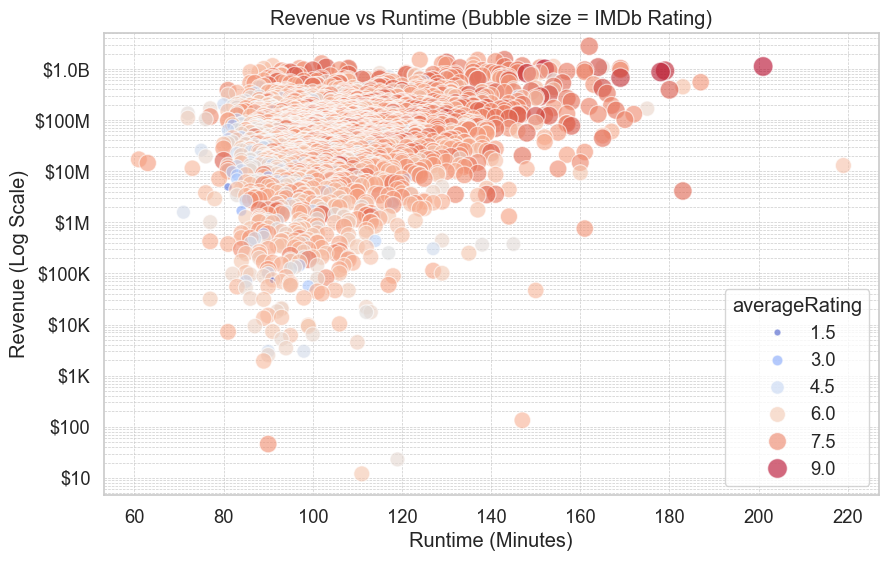

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='runtimeMinutes',
    y='revenue',
    size='averageRating',
    hue='averageRating',
    palette='coolwarm',
    alpha=0.6,
    sizes=(20, 200)
)
plt.title("Revenue vs Runtime (Bubble size = IMDb Rating)")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Revenue (Log Scale)")

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_kmb))
plt.ylim(0, 5e9)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [74]:
df['rating_bin'] = pd.cut(df['averageRating'], bins=[0,5,7,8,10], labels=['Low','Medium','High','Very High'])
avg_revenue_by_rating = df.groupby('rating_bin')['revenue'].mean()
print("\nAverage Revenue by Rating Range:\n", avg_revenue_by_rating)



Average Revenue by Rating Range:
 rating_bin
Low          63636923.50
Medium      107642729.86
High        198046718.04
Very High   397566913.12
Name: revenue, dtype: float64


C:\Users\athul\AppData\Local\Temp\ipykernel_49548\4117412378.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_by_rating = df.groupby('rating_bin')['revenue'].mean()


In [75]:
print("Summary Statistics:")
print(df[['averageRating', 'revenue']].describe())

print("\nMissing Values:")
print(df[['averageRating', 'revenue']].isnull().sum())


Summary Statistics:
       averageRating       revenue
count        2494.00       2494.00
mean            6.38  130498573.06
std             0.94  206537061.47
min             1.30         12.00
25%             5.80   16032777.75
50%             6.40   57484725.00
75%             7.00  150631589.25
max             9.00 2787965087.00

Missing Values:
averageRating    0
revenue          0
dtype: int64


C:\Users\athul\AppData\Local\Temp\ipykernel_49548\91814378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='revenue_quartile', y='averageRating', palette='Set2')


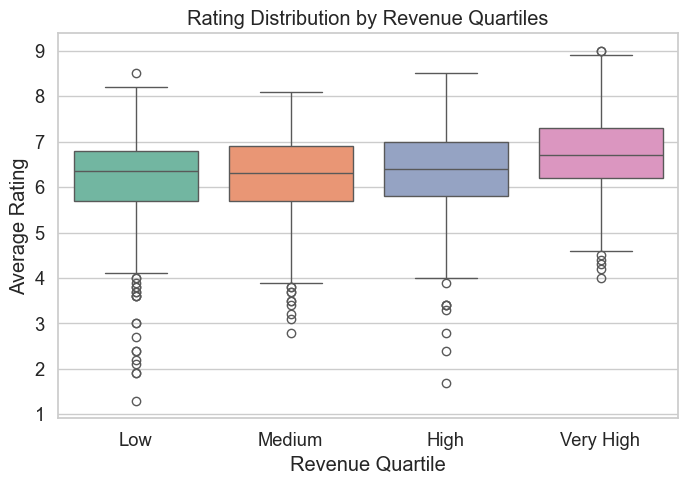

In [76]:
df['revenue_quartile'] = pd.qcut(df['revenue'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='revenue_quartile', y='averageRating', palette='Set2')
plt.title("Rating Distribution by Revenue Quartiles")
plt.xlabel("Revenue Quartile")
plt.ylabel("Average Rating")
plt.show()

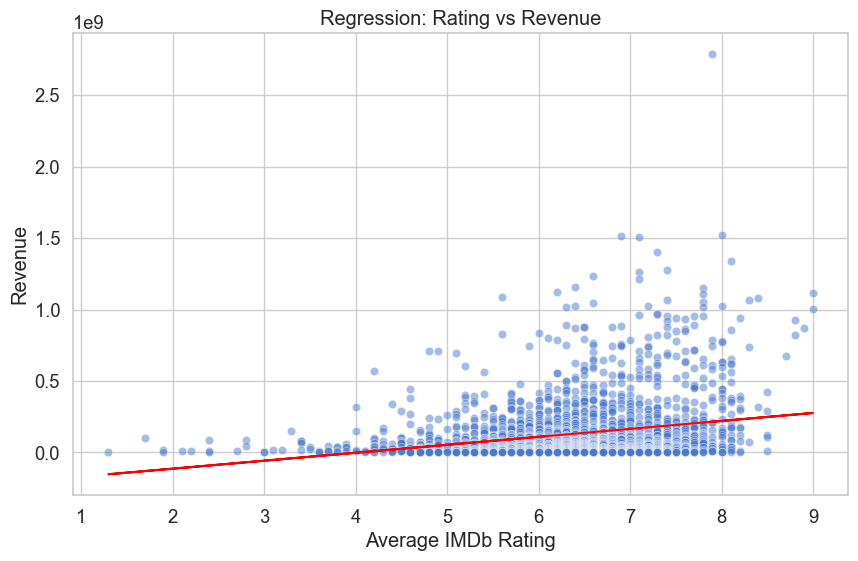

Slope: 55730768.6659492 Intercept: -224862170.66599452


In [77]:
# Prepare data
X = df[['averageRating']].dropna()
y = df['revenue'].dropna()

model = LinearRegression()
model.fit(X, y)

# Predict for plotting
predicted = model.predict(X)

# Plot regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['averageRating'], y=y, alpha=0.5)
plt.plot(X['averageRating'], predicted, color='red')
plt.title("Regression: Rating vs Revenue")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

print("Slope:", model.coef_[0], "Intercept:", model.intercept_)
